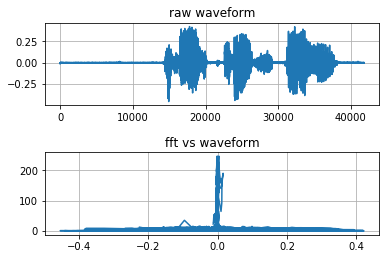

In [30]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
wavextention = ".wav"
wavfile="p232_001" # input("Please input wav file to show fft: ")
rate, data = wav.read('segan_samples/'+wavfile+wavextention)
data = data-np.mean(data)
data = data[::2]
fft_out = fft(data)

dt = 0.01
t = np.arange(0, 10, dt)

%matplotlib inline
fig = plt.figure()
plt.subplot(211)
plt.plot(data)
plt.grid()
plt.title("raw waveform")

fig.tight_layout(pad=3.0)

plt.subplot(212)
plt.plot(data, np.abs(fft_out))
plt.grid()
plt.title("fft vs waveform")

plt.show()
fig.savefig('temp.png', dpi=fig.dpi)

In [19]:
import numpy as np
import sounddevice as sd
import soundfile as sf
import time

# Samples per second
sps = 16000

# Frequency / pitch
freq_hz = 440.0

# Duration
duration_s = 5.0

# Attenuation so the sound is reasonable
atten = 0.3

# NumpPy magic to calculate the waveform
each_sample_number = np.arange(duration_s * sps)
waveform = data
waveform_quiet = waveform * atten

# Play the waveform out the speakers
sd.play(waveform_quiet, sps)
time.sleep(duration_s)
sd.stop()

In [16]:
# save changed file
sf.write(wavfile+'_x2faster'+wavextention, data, sps)